**Propuesta de Negocio**

La propuesta consiste en desarrollar una herramienta basada en aprendizaje supervisado que permita a la empresa evaluar y optimizar la estrategia de ventas de sus diferentes regiones y modelos de vehículos.

Para ello, se utilizará la base de datos de ventas disponible, la cual contiene información detallada sobre las características de los vehículos, el desempeño comercial y las zonas geográficas de distribución.

El modelo tendrá como objetivo clasificar el desempeño de ventas (por ejemplo, en categorías como bajo, medio o alto) a partir de variables explicativas tales como el tipo de vehículo, la región, el precio promedio, los incentivos aplicados, entre otras.

**Alcance de la Propuesta** 
Con esta herramienta, la empresa podrá:

Identificar patrones y factores clave que determinan el éxito de ventas en cada región.
Comparar el rendimiento de diferentes modelos bajo condiciones de mercado específicas.
Apoyar la toma de decisiones en la asignación de recursos comerciales y campañas de marketing. En última instancia, el desarrollo del modelo busca fortalecer la estrategia comercial mediante el uso de técnicas de ciencia de datos y aprendizaje automático, ofreciendo un enfoque predictivo y sustentado en evidencia cuantitativa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/jhon1142/Proyecto_Despliegue/main/BMW%20sales%20data%20(2010-2024)%20(1).csv"
df = pd.read_csv(url, encoding='utf-8')

print(df.head())


      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


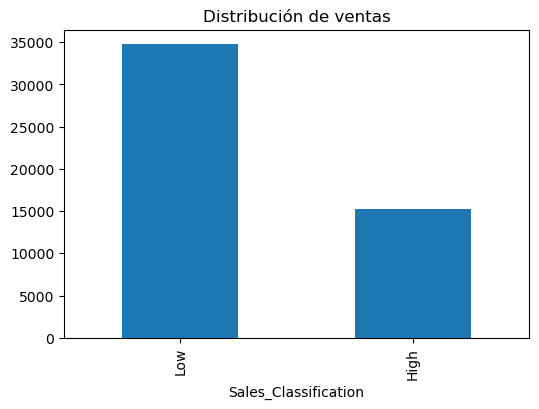

In [3]:
plt.figure(figsize=(6, 4))
df['Sales_Classification'].value_counts().plot(kind='bar')
plt.title('Distribución de ventas')
plt.show()

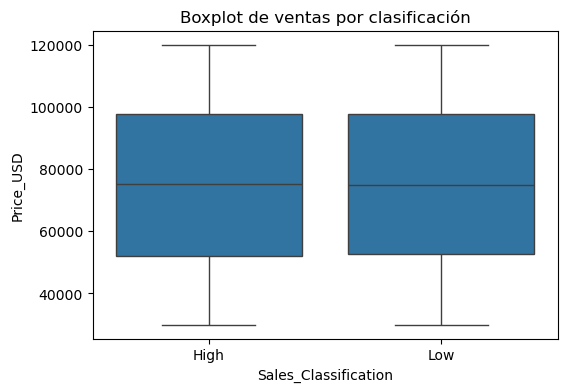

In [4]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Sales_Classification', y='Price_USD', data=df)
plt.title('Boxplot de ventas por clasificación')
plt.show()

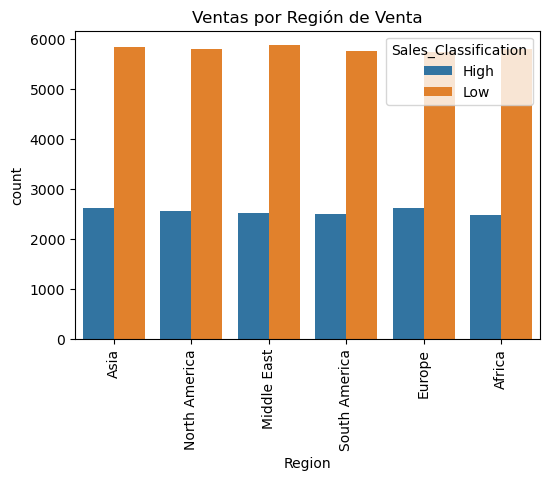

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Region', hue='Sales_Classification', data=df)
plt.xticks(rotation=90)
plt.title('Ventas por Región de Venta')
plt.show()

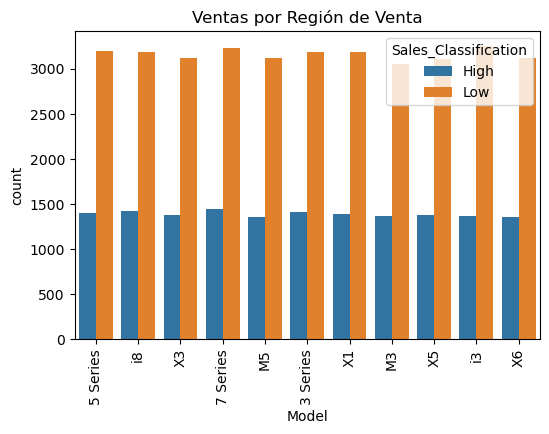

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Model', hue='Sales_Classification', data=df)
plt.xticks(rotation=90)
plt.title('Ventas por Región de Venta')
plt.show()

In [7]:
df['age_model'] = 2024 - df['Year']
df['is_luxury'] = (df['Price_USD'] > df['Price_USD'].quantile(0.75)).astype(int)

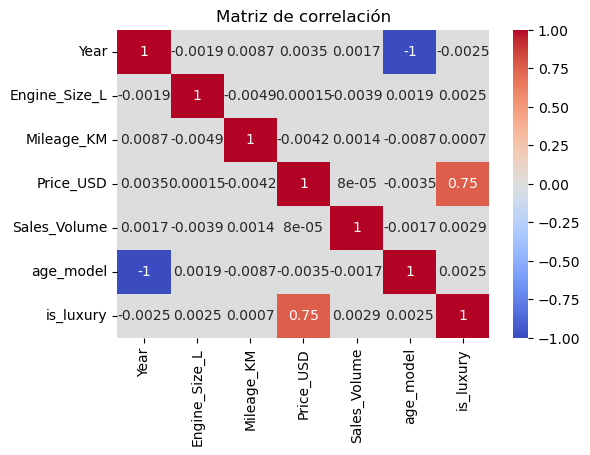

In [8]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Clasificacion de autos 

In [22]:
def clasificar_segmento(ref):
    ref = ref.upper()
    if "I3" in ref or "ELECTRIC" in ref or "HYBRID" in ref:
        return "Eléctrico / Híbrido"
    elif "I8" in ref or "M" in ref or "Z" in ref:
        return "Deportivo"
    elif "X" in ref:
        return "Camioneta / SUV"
    elif "7" in ref or "5" in ref:
        return "Ejecutivo"
    elif "3" in ref:
        return "Sedán"
    else:
        return "Otro"

df['Segmento'] = df['Model'].apply(clasificar_segmento)
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Segmento
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,Ejecutivo
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,Deportivo
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,Ejecutivo
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,Camioneta / SUV
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,Ejecutivo
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,Eléctrico / Híbrido
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,Eléctrico / Híbrido
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High,Ejecutivo
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High,Eléctrico / Híbrido


In [23]:
y = df['Sales_Classification']  # variable objetivo
X = df.drop(['Sales_Classification'], axis=1)  # variables predictoras


In [24]:
X= pd.get_dummies(
    X, 
    columns=['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Segmento'],
    drop_first=True
)
X

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,...,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Segmento_Deportivo,Segmento_Ejecutivo,Segmento_Eléctrico / Híbrido,Segmento_Sedán
0,2016,3.5,151748,98740,8300,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
1,2013,1.6,121671,79219,3428,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,2022,4.5,10991,113265,6994,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,2024,1.7,27255,60971,4047,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2020,2.1,122131,49898,3080,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2014,4.6,151030,42932,8182,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
49996,2023,4.2,147396,48714,9816,False,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False
49997,2010,4.5,174939,46126,8280,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
49998,2020,3.8,3379,58566,9486,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = X.copy()
X[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']] = scaler.fit_transform(
    X[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']]
)
X

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,...,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Segmento_Deportivo,Segmento_Ejecutivo,Segmento_Eléctrico / Híbrido,Segmento_Sedán
0,-0.234876,0.250548,0.887814,0.911817,1.131530,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
1,-0.928611,-1.632377,0.368717,0.160951,-0.573911,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,1.152595,1.241561,-1.541504,1.470514,0.674365,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,1.615085,-1.533276,-1.260805,-0.540950,-0.357231,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.690105,-1.136871,0.376656,-0.966867,-0.695729,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.697366,1.340662,0.875423,-1.234811,1.090224,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
49996,1.383840,0.944257,0.812704,-1.012409,1.662205,False,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False
49997,-1.622346,1.241561,1.288067,-1.111955,1.124529,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
49998,0.690105,0.547852,-1.672880,-0.633457,1.546689,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
from sklearn.linear_model import LogisticRegression
# --- MODELO DE REGRESIÓN LOGÍSTICA ---
logreg = LogisticRegression(
    max_iter=1000, 
    solver='lbfgs', 
    class_weight='balanced'
)
logreg.fit(X_train, y_train)

# --- PREDICCIÓN ---
y_pred = logreg.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification report:\n", classification_report(y_test, y_pred))

🔹 Accuracy: 0.994

🔹 Classification report:
               precision    recall  f1-score   support

        High       0.98      1.00      0.99      3049
         Low       1.00      0.99      1.00      6951

    accuracy                           0.99     10000
   macro avg       0.99      1.00      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
# --- MATRIZ DE CONFUSIÓN ---
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
print("🔹 Matriz de confusión (filas = reales, columnas = predichas):")
print(pd.DataFrame(cm, index=[f"Real_{c}" for c in logreg.classes_],
                      columns=[f"Pred_{c}" for c in logreg.classes_]))


🔹 Matriz de confusión (filas = reales, columnas = predichas):
           Pred_High  Pred_Low
Real_High       3049         0
Real_Low          60      6891


In [30]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': logreg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

coef_df.head(10)  # Las 10 variables que más aumentan la probabilidad de "High"



,Variable,Coeficiente
32,Segmento_Sedán,2.065515
10,Model_X3,1.994578
11,Model_X5,1.948098
12,Model_X6,1.938215
9,Model_X1,1.912950
29,Segmento_Deportivo,1.453093
30,Segmento_Ejecutivo,1.343933
31,Segmento_Eléctrico / Híbrido,0.987151
13,Model_i3,0.987151
6,Model_7 Series,0.718643


In [31]:
import numpy as np

coef_df['Odds_Ratio'] = np.exp(coef_df['Coeficiente'])
coef_df['Interpretación'] = coef_df['Coeficiente'].apply(
    lambda x: '↑ Aumenta prob. ventas altas' if x > 0 else '↓ Disminuye prob. ventas altas'
)
coef_df.head(10)


,Variable,Coeficiente,Odds_Ratio,Interpretación
32,Segmento_Sedán,2.065515,7.889363,↑ Aumenta prob. ventas altas
10,Model_X3,1.994578,7.349100,↑ Aumenta prob. ventas altas
11,Model_X5,1.948098,7.015333,↑ Aumenta prob. ventas altas
12,Model_X6,1.938215,6.946340,↑ Aumenta prob. ventas altas
9,Model_X1,1.912950,6.773042,↑ Aumenta prob. ventas altas
29,Segmento_Deportivo,1.453093,4.276319,↑ Aumenta prob. ventas altas
30,Segmento_Ejecutivo,1.343933,3.834093,↑ Aumenta prob. ventas altas
31,Segmento_Eléctrico / Híbrido,0.987151,2.683577,↑ Aumenta prob. ventas altas
13,Model_i3,0.987151,2.683577,↑ Aumenta prob. ventas altas
6,Model_7 Series,0.718643,2.051647,↑ Aumenta prob. ventas altas


## Clustering

In [32]:
X_cluster = df[['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']]
X_cluster = (X_cluster - X_cluster.mean()) / X_cluster.std()  # escalado


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Usa la misma variable que en el primer bloque
X = X_cluster  

varianza_intra_cluster = []
silhouettes = []
labels_dict = {}  # Para guardar las etiquetas de cada K

# Evaluamos entre 2 y 10 clusters (evitamos K=1 para silhouette)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    
    # Cálculo del coeficiente de Silhouette
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouettes.append(silhouette)
    
    # Guardamos las etiquetas para cada K (opcional)
    labels_dict[k] = kmeans.labels_

# --- Gráfico de la varianza intra-clúster (Elbow) ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), varianza_intra_cluster, marker='o')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra-clúster (Inercia)')

# --- Gráfico del índice de Silhouette ---
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouettes, marker='o', color='orange')
plt.title('Índice de Silhouette')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Coeficiente de Silhouette')

plt.tight_layout()
plt.show()



In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)


In [ ]:
cluster_summary = df.groupby('Cluster')[['Price_USD', 'Engine_Size_L', 'Sales_Volume']].mean()
cluster_summary


,Price_USD,Engine_Size_L,Sales_Volume
Cluster,,,
0,99297.829222,3.259359,4432.425593
1,50786.748808,3.248008,5686.481296
2,80912.864108,3.216491,7719.188615
3,68692.701543,3.265164,2405.510206
